In [5]:
# 数据集中彩色的掩码，按照colors.json中给出的编号，替换为classid写入到单通道掩码图片中
import os
import cv2
import numpy as np
import json
import glob
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
with open("/home/duhj/datasets/2017Ready/instrument_type_mapping.json", "r") as f:
    label_list = json.load(f)
label_list

{'Bipolar Forceps': 1,
 'Prograsp Forceps': 2,
 'Large Needle Driver': 3,
 'Vessel Sealer': 4,
 'Grasping Retractor': 5,
 'Monopolar Curved Scissors': 6,
 'Other': 7}

In [7]:
# 训练掩码图中，包括0在内的所有像素的值，计总数，最后的到所有类别的占比，求出各类的权重
data_dir = '/home/duhj/datasets/2017Ready/val/label/'

files = glob.iglob(data_dir+'*.bmp')
pics = 0
counts = None
num_classes = len(label_list)
for f in files:
    img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
    hist = cv2.calcHist([img], [0], None, [num_classes ], [0, num_classes ])
    if counts is None:
        counts = hist
    else:
        counts += hist
    # print(str(f), end='\r')
    pics += 1
print(counts)
print(pics)

[[2.7503386e+08]
 [7.8719710e+06]
 [5.1774350e+06]
 [1.8130146e+07]
 [3.0568990e+06]
 [0.0000000e+00]
 [5.3027230e+06]]
1200


In [8]:
counts

array([[2.7503386e+08],
       [7.8719710e+06],
       [5.1774350e+06],
       [1.8130146e+07],
       [3.0568990e+06],
       [0.0000000e+00],
       [5.3027230e+06]], dtype=float32)

In [9]:
counts = np.delete(counts, 5, axis=0)
x = pd.DataFrame(counts)
x

,0
0,275033856.0
1,7871971.0
2,5177435.0
3,18130146.0
4,3056899.0
5,5302723.0


In [10]:
x = x[1:]
x

,0
1,7871971.0
2,5177435.0
3,18130146.0
4,3056899.0
5,5302723.0


In [11]:
l = pd.DataFrame([i for i in range(1, 6)])
l

,0
0,1
1,2
2,3
3,4
4,5


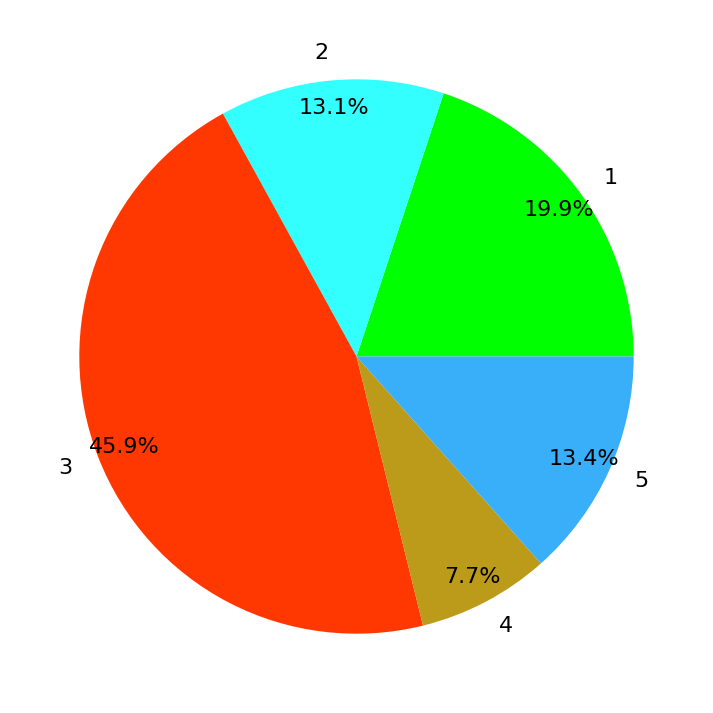

In [12]:

# colors = ["#00ff00", "#33ffff",  "#ff3700", "#18377d", "#bb9b19", "#38aff8", "#f880ed"]
colors = ["#00ff00", "#33ffff",  "#ff3700",  "#bb9b19", "#38aff8", "#f880ed"]

# 绘制饼图
plt.figure(figsize=(9, 9))
plt.rcParams.update({'font.size': 16})
plt.pie(x[0],
        labels= l[0],
        colors=colors, autopct='%1.1f%%',
        pctdistance=0.9)
# plt.legend(bbox_to_anchor=(1, 1), loc=2, frameon=False)
plt.show()

## for endovis 2018 test datsets below:

In [13]:
with open("./colors.json", "r") as f:
    label_list = json.load(f)
# label_list = label_list[:8]
label_list


[{'name': 'background-tissue', 'color': [0, 0, 0], 'classid': 0},
 {'name': 'instrument-shaft', 'color': [0, 255, 0], 'classid': 1},
 {'name': 'instrument-clasper', 'color': [0, 255, 255], 'classid': 2},
 {'name': 'instrument-wrist', 'color': [125, 255, 12], 'classid': 3},
 {'name': 'kidney-parenchyma', 'color': [255, 55, 0], 'classid': 4},
 {'name': 'covered-kidney', 'color': [24, 55, 125], 'classid': 5},
 {'name': 'thread', 'color': [187, 155, 25], 'classid': 6},
 {'name': 'clamps', 'color': [0, 255, 125], 'classid': 7},
 {'name': 'suturing-needle', 'color': [255, 255, 125], 'classid': 8},
 {'name': 'suction-instrument', 'color': [123, 15, 175], 'classid': 9},
 {'name': 'small-intestine', 'color': [124, 155, 5], 'classid': 10},
 {'name': 'ultrasound-probe', 'color': [12, 255, 141], 'classid': 11}]

In [25]:
# 训练掩码图中，包括0在内的所有像素的值，计总数，最后的到所有类别的占比，求出各类的权重
data_dir = '/home/duhj/datasets/2018-12colors/val/label/'

files = glob.iglob(data_dir+'*.bmp')
pics = 0
counts = None
num_classes = len(label_list)
for f in files:
    img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
    hist = cv2.calcHist([img], [0], None, [num_classes ], [0, num_classes ])
    if counts is None:
        counts = hist
    else:
        counts += hist
    # print(str(f), end='\r')
    pics += 1
print(counts)
print(pics)

[[1.2702312e+08]
 [2.2617780e+07]
 [4.9349580e+06]
 [5.6081730e+06]
 [6.0075736e+07]
 [3.0379388e+07]
 [3.2760800e+05]
 [6.2765000e+04]
 [4.7133000e+04]
 [0.0000000e+00]
 [7.9977820e+06]
 [2.2830950e+06]]
997


In [30]:
counts2 = np.delete(counts, [11, 9, 0], axis=0)
x = pd.DataFrame(counts2)
x

,0
0,22617780.0
1,4934958.0
2,5608173.0
3,60075736.0
4,30379388.0
5,327608.0
6,62765.0
7,47133.0
8,7997782.0


In [31]:
l = pd.DataFrame([i for i in range(1, 10)])
l

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


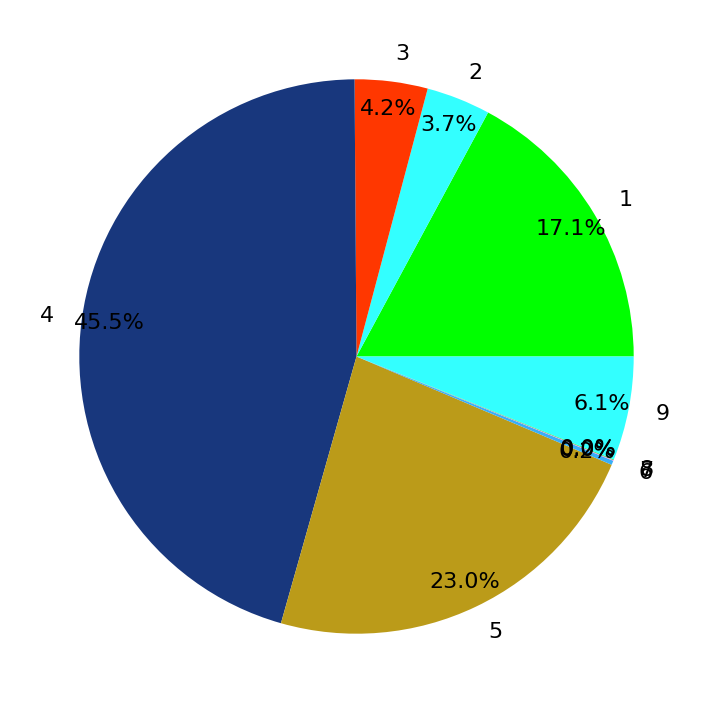

In [32]:
colors = ["#00ff00", "#33ffff",  "#ff3700", "#18377d", "#bb9b19", "#38aff8", "#f880ed"]

# 绘制饼图
plt.figure(figsize=(9, 9))
plt.rcParams.update({'font.size': 16})
plt.pie(x[0],
        labels= l[0],
        colors=colors, autopct='%1.1f%%',
        pctdistance=0.9)
# plt.legend(bbox_to_anchor=(1, 1), loc=2, frameon=False)
plt.show()